In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#### The dataset records the rental data of shared bikes. Note that the temperature is noramlized to $[0, 1]$.

In [2]:
df = pd.read_csv('day.csv')

<AxesSubplot:xlabel='temp', ylabel='cnt'>

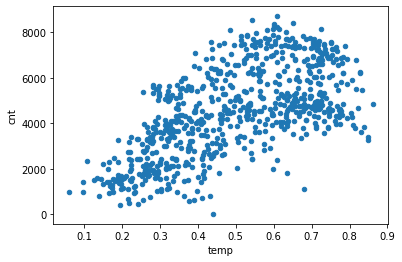

In [3]:
df.plot.scatter(x='temp', y='cnt')

In [4]:
cnt = np.array(df['cnt'])
temp = np.array(df['temp'])

### Question (a) 
#### Estimate conditional mean of numbers of rides given temperature, and plot the conditional mean together with the scatter plot.


*Note:* Both ride counts and temperature can be modeled with continous random variables. To simplify the conditional expectation, we discretize tempertures by bins with equal width. We then aggregate the ride counts data within each bin. 

c:\Users\buzga\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\buzga\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


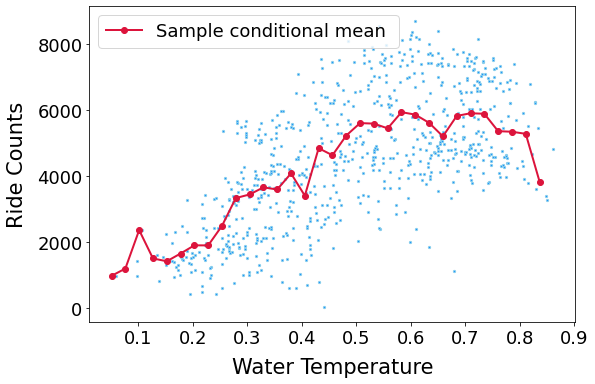

In [8]:
max_val = np.max(temp)
width_bin = 0.1
fig = plt.figure(figsize = (9,6)) 
plt.scatter(temp,cnt, s=5, c="dodgerblue", marker='o', edgecolor="skyblue")

# TODO: create bins from 0 to the maximum to discretize continous temperatures
grid = np.linspace(0,max_val,35)


# TODO: Compute the conditional expection of ride count given temperture
cond_average_cnt = np.zeros(len(grid))



### INSERT CODE HERE ###
for i in range(len(grid) - 1):
    cond_average_cnt[i] = np.mean(cnt[(temp > grid[i]) & (temp <= grid[i + 1])])
    cond_average_cnt[-1] = np.mean(cnt[temp > grid[-1]])

plt.plot(grid[1:-1],cond_average_cnt[1:-1],'-o',lw=2,color='crimson', label="Sample conditional mean ")
plt.ylabel("Ride Counts", fontsize=21,labelpad=10)
plt.xlabel("Water Temperature", fontsize=21,labelpad=10)

plt.legend(fontsize=18)
# plt.xlim(-5,30)
# plt.ylim(-12,23)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('conditional_expectation.pdf')

### Question (b)

#### Estimate conditional standard deviation, and plot the confidence interval within +/- one conditional standard deviation.

In [24]:
cond_std_cnt

array([          nan,           nan,    0.        ,  215.        ,
          0.        ,  417.59180627,  421.44955617,  627.83170427,
        783.15001795,  905.03310628,  960.24488765, 1476.63967655,
       1278.76364269, 1241.16898355, 1531.41168201, 1553.69824565,
       1554.78545753, 1896.97626933, 1408.83393751, 1466.54787398,
       1559.72644772, 1716.49500225, 1357.49168637, 1883.91937854,
       1625.85424579, 1469.67531647, 1400.64379877, 1194.36960539,
       1247.08270459, 1303.31134181, 1120.19672828, 1221.82721134,
       1092.99013605,  615.07499543,           nan])

c:\Users\buzga\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\buzga\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\buzga\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


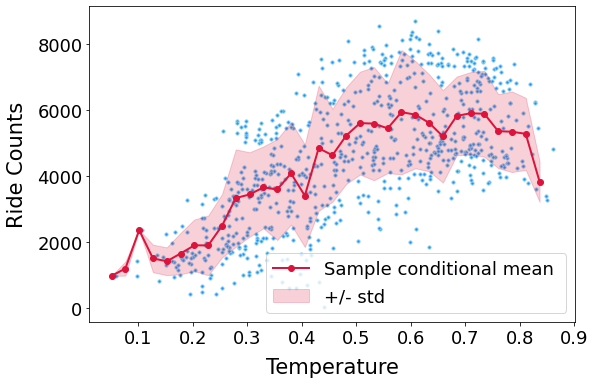

In [10]:
# TODO: Compute the conditional standard deviation of rides given temperture
cond_std_cnt = np.zeros(len(grid))


### INSERT CODE HERE ###
for i in range(len(grid) - 1):
    cond_std_cnt[i] = np.std(cnt[(temp > grid[i]) & (temp <= grid[i + 1])])
    cond_std_cnt[-1] = np.std(cnt[temp > grid[-1]])


fig = plt.figure(figsize = (9,6)) 
plt.scatter(temp, cnt, s=10, c="dodgerblue", marker='o', edgecolor="skyblue")


plt.plot(grid[1:-1],cond_average_cnt[1:-1],'-o',lw=2,color='crimson', label="Sample conditional mean ")
plt.fill_between(grid[1:-1], cond_average_cnt[1:-1]-cond_std_cnt[1:-1], 
                cond_average_cnt[1:-1]+cond_std_cnt[1:-1], color='crimson', alpha=0.2, label="+/- std")

plt.ylabel("Ride Counts", fontsize=21,labelpad=10)
plt.xlabel("Temperature", fontsize=21,labelpad=10)

plt.legend(fontsize=18)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('conditional_expectation_w_std.pdf')

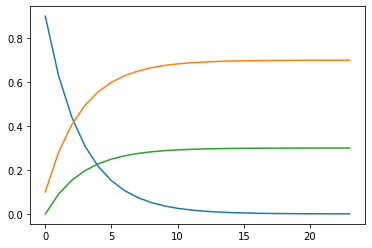

In [51]:
import numpy as np 
import matplotlib.pyplot as plt
T=np.array([[.7,0,0], [.2, 1,0], [.1,0,1]])
delta,q= np.linalg.eig(T)
np.linalg.eig(T)
q_inv=np.linalg.inv(q)
delta
temp=np.zeros([3,3])
for i in range(len(temp)-1):
    temp[i][i]=delta[i]
temp
q@temp@q_inv@np.array([.9,.1,0])
pi_not=np.array([.9,.1,0])

def next_state(T,pi_i_minus_1):
    return T@pi_i_minus_1
def states_up_2(T,pi_not,n):
    x=range(n-1)
    y=[]
    for i in x:
        y.append(pi_not)
        pi_not=next_state(T,pi_not)
        
    return x,y

x,y=states_up_2(T, pi_not,25)
plt.plot(x,y)
